<h2 style="text-align: center;">Final Project</h2>
<h3 style="text-align: center;">INSY-5376-001 </h3>
<h3 style="text-align: center;">Big Data Analytics</h3>

<ul>Real and fake image detection is an important problem in computer vision and has a wide range of applications, including social media content moderation, forensic investigation, and image authentication. The aim of this project is to develop a deep learning model that can accurately classify images as real or fake.
The project will involve training  deep convolutional neural networks (CNN) on a dataset of labeled images, where each image is annotated as either real or fake. The dataset will be split into training, validation, and testing sets, and the model will be trained using the training set and evaluated using the validation and testing sets


<ul><li>In this project, we have used a dataset that contains 1540 real and fake images with different difficulty levels for the fake images. At the first sigh, the hard to detect fake images are very difficult to detect by manual observation. even the images that have medium level of difficulty are not easy to detect. moreover, some real images looks like fake image due to their appearance. in overall, this task is challenging.
    <li>To begin with, we shall try to develop our own deep learning models and later we shall also try to implement some pr trained models using transfer learning techniques
    

In [231]:
#import the required modules
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, LSTM, Embedding, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
from PIL import Image
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [232]:
#set the warning messages off
import warnings
warnings.filterwarnings('ignore')

In [233]:
#use a pre generated function to get list of links for images
from PIL import Image
import get_link_list
real_links, real_names = get_link_list.lists('/real_and_fake_face/training_real/')
fake_links, fake_names = get_link_list.lists('/real_and_fake_face/training_fake/')


In [234]:
#visualize the shape of one image
image = Image.open(real_links[100])
img_array = img_to_array(image)
img_array.shape

(600, 600, 3)

<ul><li>We shall write a function to collect the images by looping on th links and convert them into numpy arrays of a specified size.The function visits each image in the link list and converts it into numpy array using keras.preprocessing.image function.After that it normalizes the pixel values and appends the arrayas to train and test sets.

In [235]:
# Define function to preprocess images
def preprocess_images(real_links,fake_links,IMAGE_SIZE):
    images = []
    labels=[]
    for file in real_links:
        
        # Load image
#         image = Image.open(file)
#         img = image.resize((IMAGE_SIZE, IMAGE_SIZE,3))
        img = load_img(file, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        # Convert image to numpy array
        img_array = img_to_array(img)
        # Scale pixel values to range [0, 1]
        img_array /= 255.0
        # Append image to list of images
        images.append(img_array)
        labels.append(1)
    for file in fake_links:
        
        # Load image
#         image = Image.open(file)
#         img = image.resize((IMAGE_SIZE, IMAGE_SIZE,3))
        img = load_img(file, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        # Convert image to numpy array
        img_array = img_to_array(img)
        # Scale pixel values to range [0, 1]
        img_array /= 255.0
        # Append image to list of images
        images.append(img_array)
        labels.append(0)
      
    # Convert list of images to numpy array
    images = np.array(images)
    labels=np.array(labels)
    return images, labels


In [237]:
#preprocess images and assgn them to X and y sets
X,y=preprocess_images(real_links,fake_links,64)

In [238]:
#Save values using pickle module
# import pickle
# pickle.dump(X, open('real_and_fake_faces.pkl','wb'))
# pickle.dump(y, open('labels_face_real_and_fake.pkl','wb'))

In [327]:
#retrive the X and y objects by unpickling them
import pickle
X = pickle.load(open('real_and_fake_faces.pkl','rb'))
y = pickle.load(open('labels_face_real_and_fake.pkl','rb'))

In [328]:
#split the X and y sets in train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=0)

In [329]:
#visualize the shape
X_train.shape

(1530, 64, 64, 3)

<ul><li>Now we shall build a CNN model to make predictions on our dataset

In [335]:
#define the CNN model
from keras import layers
from keras import models 
from keras import backend as K
model_1 = models.Sequential() 
model_1.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64, 64, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2))) 
model_1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_1.add(layers.Conv2D(512, (3, 3), activation='relu'))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(1, activation='sigmoid')) 

In [336]:
#visualize the structure of model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_94 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_95 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 6, 6, 128)       

In [337]:
#define a callback function to save the best model
callback = [
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )]

In [338]:
#compile the model
model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [339]:
#fit model on training data
history=model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=.2,callbacks=callback)

Epoch 1/10
39/39 [==============================] - 38s 770ms/step - loss: 0.7033 - accuracy: 0.5270 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
39/39 [==============================] - 29s 741ms/step - loss: 0.6911 - accuracy: 0.5368 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/10
39/39 [==============================] - 30s 769ms/step - loss: 0.7030 - accuracy: 0.5588 - val_loss: 0.6817 - val_accuracy: 0.5817
Epoch 4/10
39/39 [==============================] - 31s 785ms/step - loss: 0.6740 - accuracy: 0.5948 - val_loss: 0.6624 - val_accuracy: 0.6046
Epoch 5/10
39/39 [==============================] - 29s 739ms/step - loss: 0.6664 - accuracy: 0.6201 - val_loss: 0.6652 - val_accuracy: 0.6242
Epoch 6/10
39/39 [==============================] - 30s 764ms/step - loss: 0.6497 - accuracy: 0.6364 - val_loss: 0.6639 - val_accuracy: 0.5980
Epoch 7/10
39/39 [==============================] - 29s 740ms/step - loss: 0.6284 - accuracy: 0.6552 - val_loss: 0.9912 - val_accuracy: 0.4935

<ul><li>We shall build a second model and check its performance

In [340]:
#initialize the model with three Conv layers
from keras import layers
from keras import models 
from keras import backend as K
inputs = keras.Input(shape=(64, 64, 3))
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(2,2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(2,2)(x)
x = BatchNormalization()(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(inputs)
x = Dropout(0.5)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = keras.Model(inputs=inputs, outputs=outputs)

In [341]:
#compile the model
model_2.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [342]:
#define callback method to save the best model
callback = [
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )]
#fit the model with training data
history_2=model_2.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=.1,callbacks=callback)

Epoch 1/30
44/44 [==============================] - 21s 265ms/step - loss: 0.7284 - accuracy: 0.5047 - val_loss: 0.6917 - val_accuracy: 0.5556
Epoch 2/30
44/44 [==============================] - 9s 210ms/step - loss: 0.6639 - accuracy: 0.6325 - val_loss: 0.6696 - val_accuracy: 0.6275
Epoch 3/30
44/44 [==============================] - 10s 218ms/step - loss: 0.6162 - accuracy: 0.6812 - val_loss: 0.6587 - val_accuracy: 0.6144
Epoch 4/30
44/44 [==============================] - 9s 212ms/step - loss: 0.5460 - accuracy: 0.7444 - val_loss: 0.6381 - val_accuracy: 0.6144
Epoch 5/30
44/44 [==============================] - 9s 206ms/step - loss: 0.4921 - accuracy: 0.7894 - val_loss: 0.6734 - val_accuracy: 0.5882
Epoch 6/30
44/44 [==============================] - 9s 217ms/step - loss: 0.4417 - accuracy: 0.8221 - val_loss: 0.6199 - val_accuracy: 0.6797
Epoch 7/30
44/44 [==============================] - 9s 213ms/step - loss: 0.3817 - accuracy: 0.8584 - val_loss: 0.6265 - val_accuracy: 0.6667
Epoc

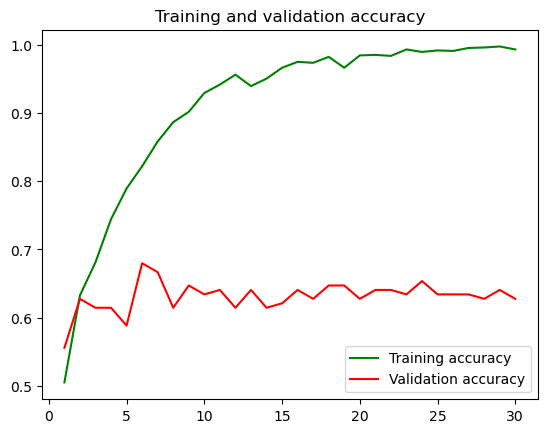

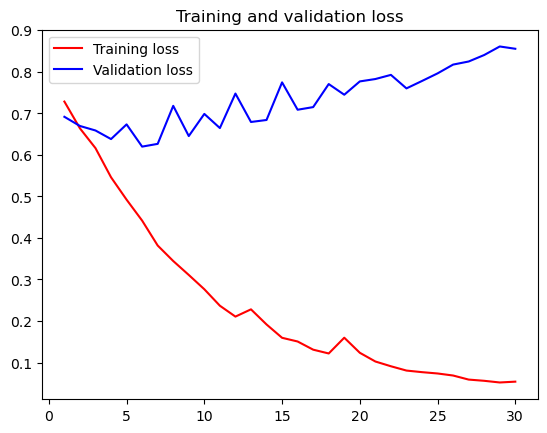

In [343]:
#visualize the plots for training and validation scores
import matplotlib.pyplot as plt
accuracy = history_2.history["accuracy"]
val_accuracy = history_2.history["val_accuracy"]
loss = history_2.history["loss"]
val_loss = history_2.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

<ul><li>We can see a high degree of overfitting in th model. while the training accuracy reached near perfect level, the validation accuracy never went up above 65%. we tried techniques like Maxpooling, Batchnormalization and dropout with different combination of layers, but could not achieve better accuracy scores.

<ul><li>Now we shall try to implement image augmentation in our training data to improve scores on unseen dataset.

In [344]:
#define the datagen for image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
                             zoom_range = 0.2, # Randomly zoom image
                             width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
                             horizontal_flip=True, # randomly flip images horizontally
                             vertical_flip=False) # Don't randomly flip images vertically
          

In [345]:
#fit datagen with training dataset
datagen.fit(X_train)

In [347]:
#Define the CNN model
inputs = keras.Input(shape=(64, 64, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(2,2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(2,2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = Dropout(0.5)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = keras.Model(inputs=inputs, outputs=outputs)

In [348]:
#compile the model
model_3.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [351]:
#create partitions for training and validation sets
partition=int(len(X_train)*.9)
X_train_part = X_train[:partition]
X_val = X_train[partition:]
y_train_part = y_train[:partition]
y_val = y_train[partition:]
print(X_train_part.shape, X_val.shape, y_train_part.shape, y_val.shape)

(1377, 64, 64, 3) (153, 64, 64, 3) (1377,) (153,)


In [353]:
#fit the CNN model with augmented training data
history_3=model_3.fit(datagen.flow(X_train_part,y_train_part, batch_size=32), # Default batch_size is 32. We set it here for clarity. 
          epochs=10, steps_per_epoch=len(X_train_part)/32,# Run same number of steps we would if we were not using a generator.
          validation_data = (X_val,y_val))

Epoch 1/10
43/43 [==============================] - 134s 3s/step - loss: 0.6922 - accuracy: 0.5265 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 2/10
43/43 [==============================] - 121s 3s/step - loss: 0.6927 - accuracy: 0.5280 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/10
43/43 [==============================] - 127s 3s/step - loss: 0.6922 - accuracy: 0.5280 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/10
43/43 [==============================] - 133s 3s/step - loss: 0.6926 - accuracy: 0.5272 - val_loss: 0.6934 - val_accuracy: 0.5033
Epoch 5/10
43/43 [==============================] - 132s 3s/step - loss: 0.6925 - accuracy: 0.5265 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 6/10
43/43 [==============================] - 119s 3s/step - loss: 0.6921 - accuracy: 0.5287 - val_loss: 0.6930 - val_accuracy: 0.5033
Epoch 7/10
43/43 [==============================] - 121s 3s/step - loss: 0.6923 - accuracy: 0.5287 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 8/10
43

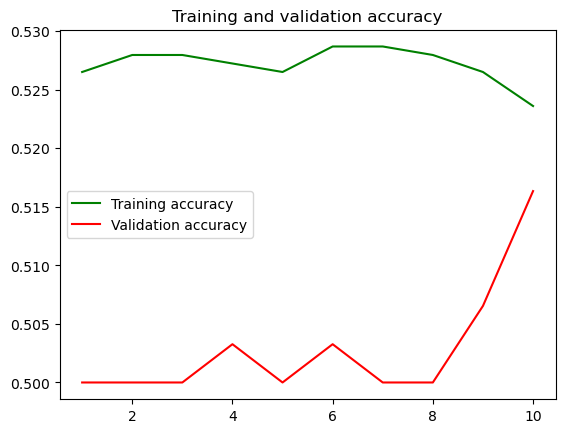

<Figure size 640x480 with 0 Axes>

In [354]:
#visualize the plots for training and validation scores
import matplotlib.pyplot as plt
accuracy = history_3.history["accuracy"]
val_accuracy = history_3.history["val_accuracy"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.show()

<ul><li>We can again observe that while the gap between training and validation scores are reduced and they are in sync, but the model is not able to achieve a good accuracy score 

<ul><li>Now we shall try to use pretrained models by using transfer learning techniques

### Using VGG16 Pretrained Model

In [59]:
#import the required modules and libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

# Define the input shape and number of classes
input_shape = (64, 64, 3)
num_classes = 2

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model
for layer in base_model.layers[:-3]:
    layer.trainable = False

# Add new layers on top of the base model
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
predictions = Dense(num_classes, activation='sigmoid')(x)


In [60]:
from tensorflow import keras

# Define the new model
VGG16_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = 'rmsprop'
VGG16_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



In [61]:
# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True, vertical_flip=False)#target_size=input_shape[:2],
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('real_and_fake_face', target_size=(64,64), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('real_and_fake_test', target_size=(64,64), batch_size=32, class_mode='categorical')



Found 1091 images belonging to 2 classes.
Found 1091 images belonging to 2 classes.


In [62]:
# Train the model
VGG16_history = VGG16_model.fit(train_generator, epochs=30, validation_data=test_generator)



Epoch 1/30
35/35 [==============================] - 336s 8s/step - loss: 0.7304 - accuracy: 0.5270 - val_loss: 0.6758 - val_accuracy: 0.5463
Epoch 2/30
35/35 [==============================] - 271s 8s/step - loss: 0.6853 - accuracy: 0.5830 - val_loss: 0.6491 - val_accuracy: 0.6379
Epoch 3/30
35/35 [==============================] - 246s 7s/step - loss: 0.6583 - accuracy: 0.6049 - val_loss: 0.6532 - val_accuracy: 0.5793
Epoch 4/30
35/35 [==============================] - 239s 7s/step - loss: 0.6352 - accuracy: 0.6453 - val_loss: 0.6017 - val_accuracy: 0.6865
Epoch 5/30
35/35 [==============================] - 306s 9s/step - loss: 0.6101 - accuracy: 0.6654 - val_loss: 0.5918 - val_accuracy: 0.6572
Epoch 6/30
35/35 [==============================] - 221s 6s/step - loss: 0.5965 - accuracy: 0.6920 - val_loss: 0.5226 - val_accuracy: 0.7379
Epoch 7/30
35/35 [==============================] - 219s 6s/step - loss: 0.5610 - accuracy: 0.7278 - val_loss: 0.5470 - val_accuracy: 0.7030
Epoch 8/30
35

In [38]:
# import pickle
# pickle.dump(VGG16_model, open('VGG16_model_faces.pkl','wb'))

In [63]:
import pickle
pickle.dump(VGG16_model, open('VGG16_model_faces_v2.pkl','wb'))

In [64]:
# Evaluate the model
test_loss, test_acc = VGG16_model.evaluate(test_generator)
print('Test accuracy:', test_acc)


35/35 [==============================] - 29s 826ms/step - loss: 0.0849 - accuracy: 0.9661
Test accuracy: 0.9660861492156982


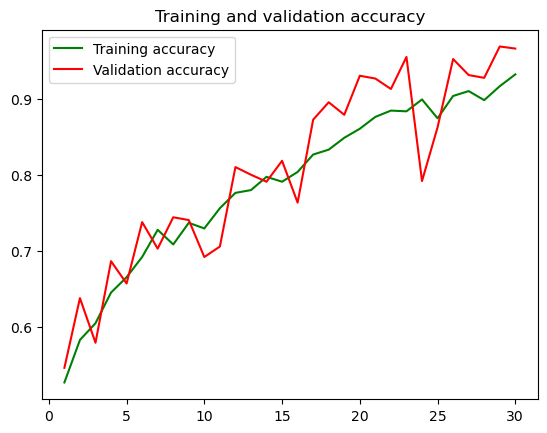

<Figure size 640x480 with 0 Axes>

In [105]:
#visualize the plots for training and validation scores
import matplotlib.pyplot as plt
accuracy = VGG16_history.history["accuracy"]
val_accuracy = VGG16_history.history["val_accuracy"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.show();

<ul><li>We shall create a function to create random links and to make predictions on random images

In [372]:
#import required modules and libraries
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import random

from PIL import Image
import get_link_list
#using get_links function retrive the test set links
real_links_test, real_names_test = get_link_list.lists('test/real_test')
fake_links_test, fake_names_test = get_link_list.lists('test/fake_test')

#define function to see prediction results on randomly selected images
def show_results(model,comb,names):

    #random.seed(0)
    img_path= comb[random.randint(0,len(comb)-1)]
    img = image.load_img(img_path, target_size=(64, 64))
    name=''
    for i in names:
        if i in img_path:
            name= i       
    

    #Preprocess the image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    #img_array = preprocess_input(img_array)

    # Make prediction
    preds = model.predict(img_array)
    if preds[0][0] < 0.5:
        label=f'Real face detected.\n Detection confidence score: {((1-preds[0][0])*100):.2f}%\n {name}'#.format((1-preds[0][0])*100),.format(name)
    else:
        label=f'Fake face detected. \n Detection confidence score: {(preds[0][0]*100):.2f}%\n{name}'#.format(preds[0][0]*100), .format(name)

    fig, ax = plt.subplots(figsize=(4, 4))
    pic = np.array(mpimg.imread(img_path))
    ax.set_title(label)
    ax.set(xticks=[], yticks=[]);
    ax.imshow(pic); 



1/1 [==============================] - 0s 105ms/step


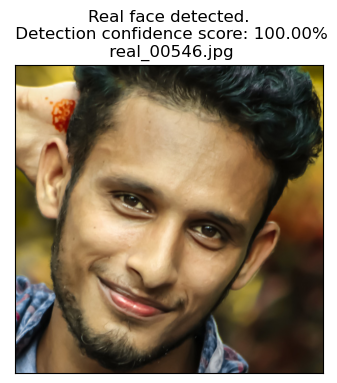

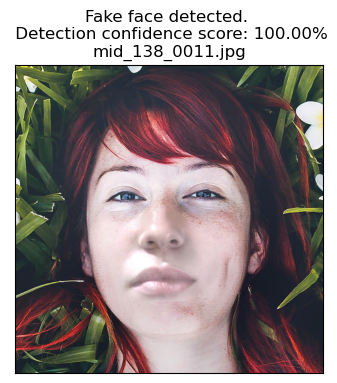

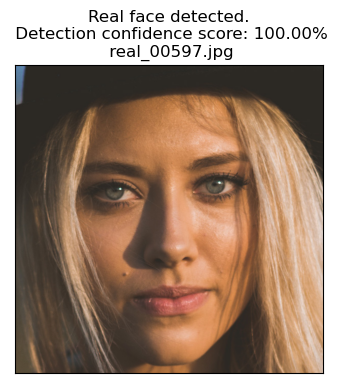

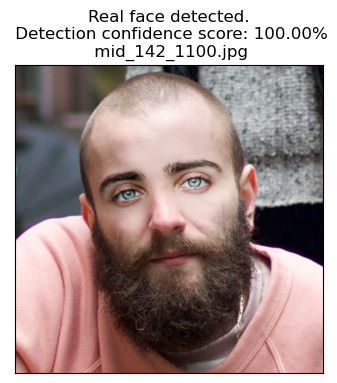

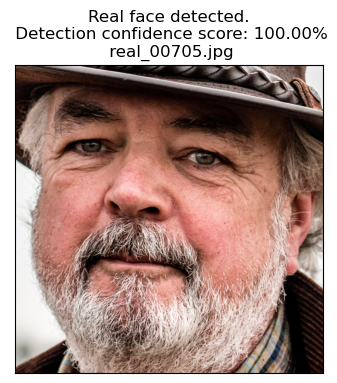

In [375]:
#import the saved model 
import pickle
model_vgg = pickle.load(open('VGG16_model_faces_v2.pkl','rb'))
lists=[]
lists.extend(real_links_test)
lists.extend(fake_links_test)
names=[]
names.extend(real_names_test)
names.extend(fake_names_test)
#call function to see prediction results
for i in range(5):
    show_results(model_vgg,lists,names)

<ul><li>We shall try to implement another pretrained model 

### Using Xception pretrained model

In [2]:
#import required modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.xception import Xception

#path for training and validation sets
train_dir = 'C:/Users/manas_nmr2rze/Desktop/Big_Data/Project/real_and_fake_face'
val_dir = 'C:/Users/manas_nmr2rze/Desktop/Big_Data/Project/real_and_fake_test'
# Define the input image size
input_size = (64, 64)
# Define the batch size
batch_size = 32
# Define the number of epochs
num_epochs = 10
# Define the learning rate
learning_rate = 0.0001
# Define the number of classes
num_classes = 2

# Create the data generators for the training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=input_size,
                                                    batch_size=batch_size,class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(val_dir,target_size=input_size,
                                                batch_size=batch_size,class_mode='categorical')



Found 1400 images belonging to 2 classes.
Found 340 images belonging to 2 classes.


In [3]:
#load the base modeland remove top layers
base_model = Xception(weights='imagenet', include_top=False)
# Freeze the pre-trained model weights
for layer in base_model.layers[:-1]:
    layer.trainable = False

In [8]:
#initialize the model 
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Add a fully-connected layer
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
# Add a final output layer for binary classification (fake vs real)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base model and top layers into a single model
X_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model's layers to only train the top layers
for layer in base_model.layers:
    layer.trainable = False

In [9]:
# Compile the model
X_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
# Train the model
history_X=X_model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
44/44 [==============================] - 65s 1s/step - loss: 0.9674 - accuracy: 0.5000 - val_loss: 0.7943 - val_accuracy: 0.5000
Epoch 2/10
44/44 [==============================] - 39s 897ms/step - loss: 0.8610 - accuracy: 0.5000 - val_loss: 0.7119 - val_accuracy: 0.5000
Epoch 3/10
44/44 [==============================] - 42s 966ms/step - loss: 0.8361 - accuracy: 0.5000 - val_loss: 0.7084 - val_accuracy: 0.5000
Epoch 4/10
44/44 [==============================] - 41s 925ms/step - loss: 0.7978 - accuracy: 0.5000 - val_loss: 0.7166 - val_accuracy: 0.5000
Epoch 5/10
44/44 [==============================] - 39s 892ms/step - loss: 0.7760 - accuracy: 0.5000 - val_loss: 0.7122 - val_accuracy: 0.5000
Epoch 6/10
44/44 [==============================] - 39s 881ms/step - loss: 0.7539 - accuracy: 0.5000 - val_loss: 0.7024 - val_accuracy: 0.5000
Epoch 7/10
44/44 [==============================] - 39s 886ms/step - loss: 0.7397 - accuracy: 0.5000 - val_loss: 0.7038 - val_accuracy: 0.5000
Ep

In [12]:
# Evaluate the model
test_loss, test_acc =X_model.evaluate(val_generator)
print('Test accuracy:', test_acc)


11/11 [==============================] - 7s 624ms/step - loss: 0.6940 - accuracy: 0.5000
Test accuracy: 0.5


<ul><li>This accuracy score is not usable for a binary classification problem. so this model cant be used for our purpose.

<ul><li>In conclusion, real and fake face detection using deep learning has shown great potential in addressing the growing problem of fake images and videos on the internet. Deep learning algorithms such as Convolutional Neural Networks (CNNs) have been applied to detect fake faces which are being generated using various techniques including Generative Adversarial Networks (GANs) and Deepfakes.
These algorithms have demonstrated modest accuracy rates in distinguishing real faces from fake ones. So, the challenge remains in developing more advanced algorithms for detecting various forms of fake faces that are generated with increasing levels of realism.
Nonetheless, the progress made so far in real and fake face detection using deep learning holds great promise in combating the spread of fake images and videos online.
